In [8]:
import pandas as pd
from plotly.tools import mpl_to_plotly
import dash_core_components as dcc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mc
import colorsys
from random import randint
import plotly.tools as tls
import re
import plotly.graph_objects as go
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
data = pd.read_csv('table.csv', usecols=['Country_Name','Years','Ratio GDP', 'Continent_Name','Receipts_PCapita'])

# BAR PLOT RACE 

In [4]:
df = data[data['Continent_Name']=='Europe']
df.loc[:,'Ratio GDP'] *= 100
df.loc[:,'Ratio GDP'] = round(df['Ratio GDP'],2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
#Get random colors
def transform_color(color, amount = 0.5):

    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

all_names = df['Country_Name'].unique().tolist()
random_hex_colors = []
for i in range(len(all_names)):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))

rgb_colors = [transform_color(i, 1) for i in random_hex_colors]
rgb_colors_opacity = [rgb_colors[x] + (0.825,) for x in range(len(rgb_colors))]
rgb_colors_dark = [transform_color(i, 1.12) for i in random_hex_colors]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

def get_flag(name):
    path = "Flags/Europe/{}.png".format(name.title())
    im = plt.imread(path)
    return im

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.3)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)
    


In [10]:

def draw_barchart(year):
    #fig, ax = plt.subplots(figsize=(15, 8))    
    #Colors for the bar plot, based on the previous function that creates random hex colors
    normal_colors = dict(zip(df['Country_Name'].unique(), rgb_colors_opacity))
    dark_colors = dict(zip(df['Country_Name'].unique(), rgb_colors_dark))

    
    #Get the 10 or 5 highest values throughout the years
    dff = df[df['Years'].eq(year)].sort_values(by='Ratio GDP', ascending=True).tail(10)
    ax.clear()
    
    #Define the bar plot
    ax.barh(dff['Country_Name'], dff['Ratio GDP'], color=[normal_colors[x] for x in dff['Country_Name']])
    dx = dff['Ratio GDP'].max() /200
    
    #weight= how bold the color is
    #i-.25 to be a bit after the end of the bar 
    #.2f} means 2 decimal points after the value
    
    for i, (value, name) in enumerate(zip(dff['Ratio GDP'], dff['Country_Name'])):
        ax.text(value-dx, i-.25,     name,           size=16, weight=600, ha='right', va='baseline')
        #ax.text(value, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline') #add the continent names
        ax.text(value+dx, i-.25,     f'{value:,.2f}%', size=16, ha='left',  va='baseline')
        #Add the flags 
        #offset_image(i,name, ax)
        
    #Style of the plot
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Tourism as % of GDP', transform=ax.transAxes, size=12, color='#777777')
    #
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Tourism as % of GDP - Top 10 European Countries',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    
    plt.box(False)


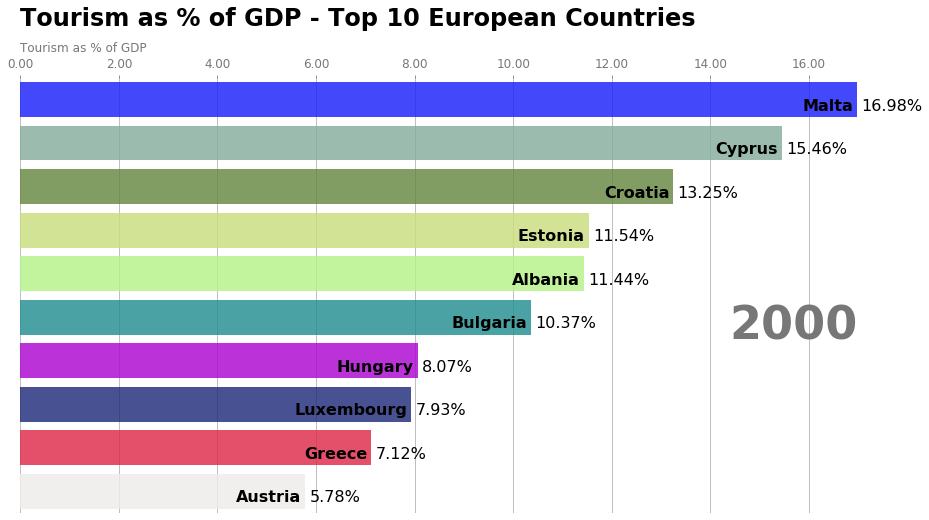

In [27]:

fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2000, 2016),interval = 800)
HTML(animator.to_jshtml())


In [28]:
#Does NOT Work, dunno how to call it 
RaceBar = HTML(animator.to_jshtml())
plotly_fig = tls.mpl_to_plotly(RaceBar)
#graph = dcc.Graph(id='myGraph', fig=plotly_fig)


AttributeError: 'HTML' object has no attribute 'canvas'